# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head(3)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [5]:
# 1. Is the distribution of body temperatures normal? 

Text(0, 0.5, 'frequency')

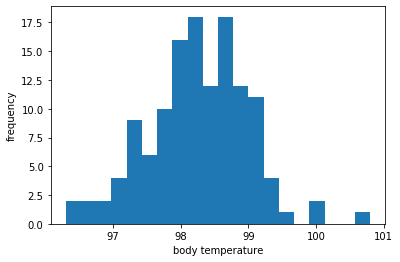

In [36]:
# This distibution below appears to be approximately normal.

plt.hist(df['temperature'],bins=20);
plt.xlabel('body temperature')
plt.ylabel('frequency')

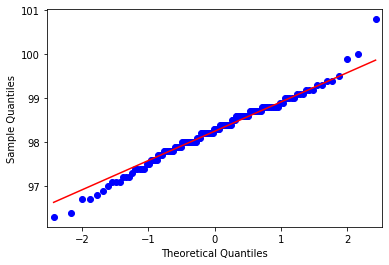

In [7]:
# qqplot to compare temperature data with normal distribution. The temperature data is close to being normally distributed.

# The slope of the fitted line is less steep than y=x indicating that temperature distribution is less dispersed than a 
# normal distribution. 

import statsmodels.api as sm

fig = sm.qqplot(df['temperature'],line='q')

In [8]:
# Agostino's K-squared test

# H0: the sample has a normal distribution.
# HA: the sample does not have a normal distribution.

# pvalue=0.25874. We do not reject the null hypothesis.

import scipy 

scipy.stats.normaltest(df['temperature'])

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

In [10]:
# Anderson–Darling test

# H0: the sample has a normal distribution.
# HA: the sample does not have a normal distribution.

# pvalue=0.18292. We do not reject the null hypothesis.

import statsmodels

statsmodels.stats.diagnostic.normal_ad(df['temperature'])

(0.5201038826714921, 0.18292460444352898)

In [11]:
# Shapiro-Wilk Test

# H0: the sample has a normal distribution.
# HA: the sample does not have a normal distribution.

# pvalue=0.23316. We do not reject the null hypothesis.

from scipy.stats import shapiro

scipy.stats.shapiro(df['temperature'])

(0.9865769743919373, 0.2331680953502655)

In [12]:
# 2. Is the sample size large? Are the observations independent?

In [ ]:
# The sample is considered large if the number of observations is greater than or equal to 30.
# The temperature observations are independent if each observation was taken from a different person.

In [13]:
# 3. Is the true population mean really 98.6 degrees F? 

In [28]:
# Sample Mean is lower than 98.6 degrees F.

df['temperature'].mean()

98.24923076923078

In [29]:
# First, try a bootstrap hypothesis test:

In [30]:
# H0: mean temperature is equal to 98.6
# HA: mean temperature is not equal to 98.6.

# P = 0.0 therefore we reject the null hypothesis in favour of the alternative hypothesis.

translated_temperature=df['temperature'] - np.mean(df['temperature']) + 98.6
bs_replicates = np.empty(10000)

for i in range(10000):
        bs_replicates[i] = np.mean(np.random.choice(translated_temperature, size=len(df['temperature'])))
    
p = np.sum(bs_replicates <= np.mean(df['temperature']))/ 10000

print('p = ', p)

p =  0.0


In [31]:
# Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why? 
# In this situation, is it appropriate to use the 𝑡 or 𝑧 statistic? 

In [ ]:
# A one sample test was used because we have a data set which has a mean of 98.249 that we wish to compare to a mean of 98.6
# which is claimed to be the population mean. However, we do not have the data used to calculate the mean of 98.6. Thus, we
# do not have two samples to compare.

# t-statistic is used in cases where the sample size is less than 30 or the population standard deviation is unknown.
# z-statistic is used in cases where the sample size is above 30 and the population standard deviation is known.

# In this situation, the t-statistic is used because the population standard deviation is unknown.

In [32]:
# t-test

# H0: mean temperature is equal to 98.6
# HA: mean temperature is not equal to 98.6.

# pvalue=2.4106e-07 which is practically zero. We reject the null hypothesis in favour of the alternative hypothesis.

scipy.stats.ttest_1samp(df['temperature'],98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [33]:
# Now try using the other test. How is the result be different? Why?

In [34]:
# z-test

# H0: mean temperature is equal to 98.6
# HA: mean temperature is not equal to 98.6.

# pvalue=4.902e-08 which is practically zero.We reject the null hypothesis in favour of the alternative hypothesis.

# The test statistic calculated is the same as the test statistic calculated by the t-test.

statsmodels.stats.weightstats.ztest(x1=df['temperature'],x2=None,value=98.6, alternative='two-sided', usevar='pooled', ddof=1.0)


(-5.4548232923645195, 4.9021570141012155e-08)

In [35]:
# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 
# Which one is the correct one to use? 
# what do you notice? What does this tell you about the difference in application of the 𝑡 and 𝑧 statistic? 

# H0: mean temperature is equal to 98.6
# HA: mean temperature is not equal to 98.6.

# The t and z test results do not agree. z-test has the exact same p-value as when it was performed for 130 observations and
# tells us to reject the null hypothesis. The t-test has a p-value of 0.2729 which tells us not to reject the null hypothesis.
# As per the output below, 5 of the 10 observations drawn are greater than or equal to 98.6 indicating that a mean of 98.6 is
# possible. The sample size of ten is too small for a z-test to work properly.

np.random.seed(4)
tensample = np.random.choice(df['temperature'], size=10)
tenmean=np.mean(tensample)
ttest =scipy.stats.ttest_1samp(tensample,98.6)
ztest=statsmodels.stats.weightstats.ztest(x1=df['temperature'],x2=None,value=98.6, alternative='two-sided', \
                                          usevar='pooled', ddof=1.0)

print("tensample_datapoints{}".format(tensample))
print("tensample_samplemean {}".format((tenmean)))
print(ttest)
print("Ztest_result{}".format(ztest))

tensample_datapoints[99.  98.7 97.6 98.  98.9 98.2 99.4 97.3 97.8 98.6]
tensample_samplemean 98.35
Ttest_1sampResult(statistic=-1.1677484162422795, pvalue=0.2729122150940388)
Ztest_result(-5.4548232923645195, 4.9021570141012155e-08)


In [ ]:
# 5. At what temperature should we consider someone's temperature to be "abnormal"? 
# As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach. 
# Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind 
# that you should use the appropriate formula for one draw, and not N draws.

In [ ]:
# As per the reuslts below, abnormal body temperature would be above 98.37 and below 98.12 if using 95% confidence interval.

In [127]:
# Frequentist Approach - Mean calculation

mean=df['temperature'].mean()

98.24923076923078


In [126]:
# Frequentist Approach - Standard Error of Mean Calculation.

sem = np.std(df['temperature']) / np.sqrt(len(df['temperature']))
print(sem)

0.06405661469519336


In [144]:
# Frequentist Approach - 95% Confidence Interval Calculation.

print(98.24923076923078+sem*1.98)
print(98.24923076923078-sem*1.98)

98.37606286632726
98.1223986721343


98.24931633846154
0.06431072446689623
[98.12307692 98.37461538]


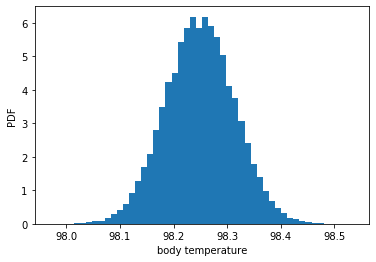

In [37]:
# Bootstrapped Mean, SEM and Confidence Interval

bs_replicates = np.empty(100000)

for i in range(100000):
        bs_replicates[i] = np.mean(np.random.choice(df['temperature'], size=len(df['temperature'])))

bs_mean=bs_replicates.mean()        
print(bs_mean)

bs_std = np.std(bs_replicates)
print(bs_std)

bs_con=np.percentile(bs_replicates,[2.5,97.5])
print(bs_con)

_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('body temperature')
_ = plt.ylabel('PDF')

plt.show()

In [ ]:
# 6. Is there a significant difference between males and females in normal temperature? 
# What testing approach did you use and why? 
# Write a story with your conclusion in the context of the original problem.

In [ ]:
# I used a difference of means bootstrapping test to determine if there was a significant difference in male and female
# body temperature. Test results indciated that I reject the null hypothesis in favour of the alternative hypothesis.

# 0: difference of means equals 0.
# HA: difference of means does not equal 0.

In [2]:
# Split the data set into male and female and perform count to show that the data was 50% male and 50% female.

M = df[df['gender']=='M']['temperature']
F = df[df['gender']=='F']['temperature']
print(M.count())
print(F.count())

65
65


In [4]:
# Two Sample Bootstrap test for difference of means.

# H0: difference of means equals 0.
# HA: difference of means does not equal 0.

# p-value = 0.01. Therefore, we reject the null hypothesis in favour of the alternative hypothesis.

Mshifted= M - np.mean(M) + df['temperature'].mean()
Fshifted= F - np.mean(F) + df['temperature'].mean()

n=100000

bs_rep_M = np.empty(n) 
bs_rep_F = np.empty(n) 

for i in range(n):
        bs_rep_M[i] = np.mean(np.random.choice(Mshifted, size=65))
        bs_rep_F[i] = np.mean(np.random.choice(Fshifted, size=65))

bs_rep = bs_rep_F - bs_rep_M
                              
p = np.sum(bs_rep >= (F.mean()-M.mean())) / n
print('p-value =', p)

p-value = 0.01101


In [41]:
# Frequntist test confirms the result.

# H0: difference of means equals 0.
# HA: difference of means does not equal 0.

# p-value = 0.02. Therefore, we reject the null hypothesis in favour of the alternative hypothesis.

scipy.stats.ttest_ind(M,F)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)